In [14]:
%pip install pandas
%pip install matplotlib
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
%pip uninstall opencv-python opencv-python-headless
%pip install opencv-python opencv-python-headless


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2

data_dir = 'C:/Users/user/OneDrive/Masaüstü/fer2013' #path of dataset
train_dir = os.path.join(data_dir, "train") #we obtain => data_dir/train (train dir under the fer2013 dir)
test_dir = os.path.join(data_dir, "test") #we obtain => data_dir/test  path

first_3_images = {} 

# iterate over each category
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category) #we obtain path for each category (ex = .../train/surprise)
    if os.path.isdir(category_path):  # check if it is a dir or not
        images = sorted(os.listdir(category_path))[:3]  # take the first 3 images
        first_3_images[category] = [os.path.join(category_path, img) for img in images] #path for each img in categories

# print the result
for category, images in first_3_images.items():
    print(f"Category: {category}")
    for img in images:
        print(f"  {img}")


Category: angry
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\angry\Training_10118481.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\angry\Training_10120469.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\angry\Training_10131352.jpg
Category: disgust
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\disgust\Training_10371709.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\disgust\Training_10598340.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\disgust\Training_1070239.jpg
Category: fear
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\fear\Training_10018621.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\fear\Training_10031494.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\fear\Training_10110501.jpg
Category: happy
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\happy\Training_10019449.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\happy\Training_10046809.jpg
  C:/Users/user/OneDrive/Masaüstü/fer2013\train\happy\Training_10066226.jpg
Category: neutral
  C

Displaying 3 images for category: angry


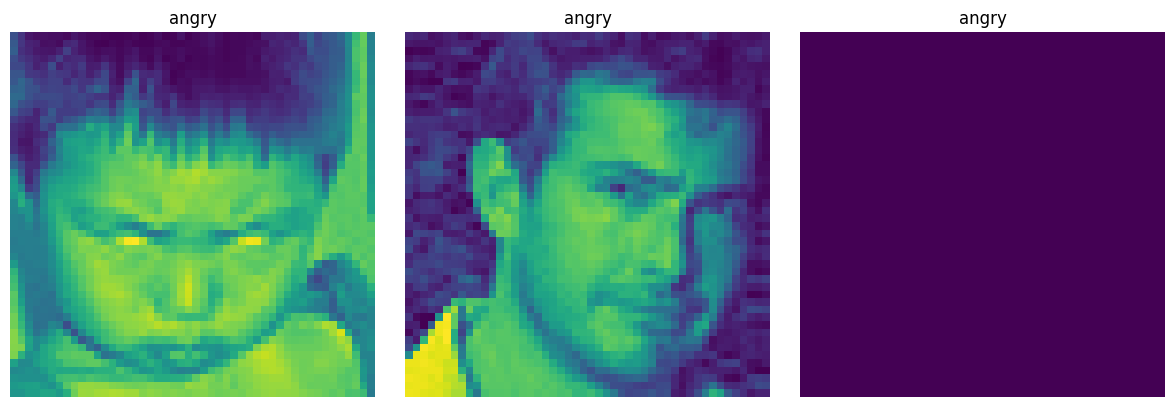

Displaying 3 images for category: disgust


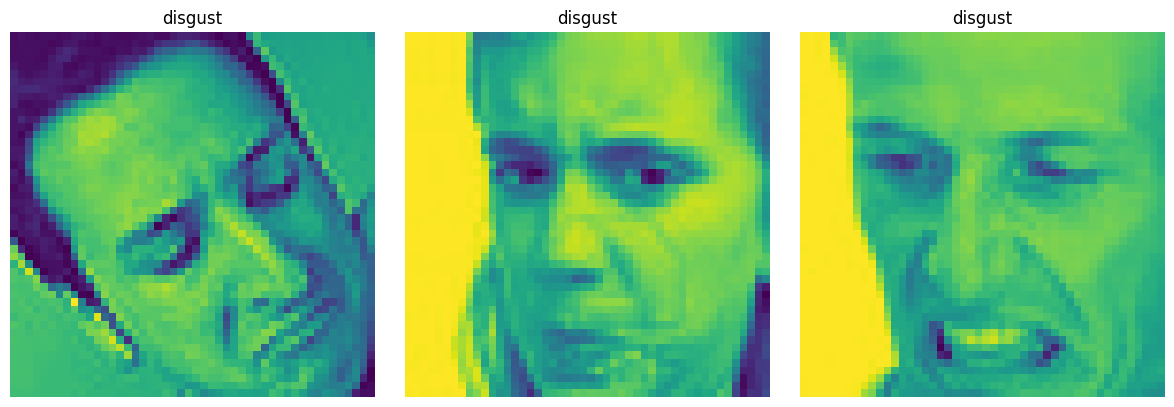

Displaying 3 images for category: fear


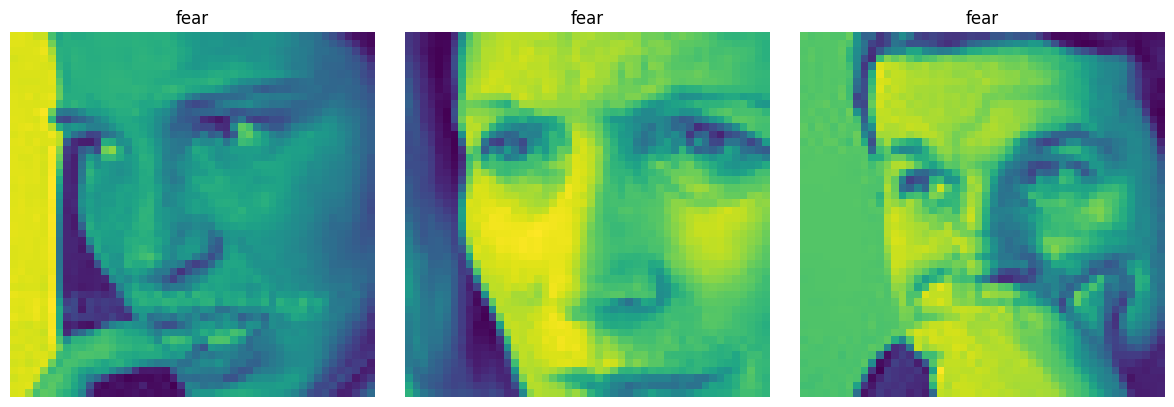

Displaying 3 images for category: happy


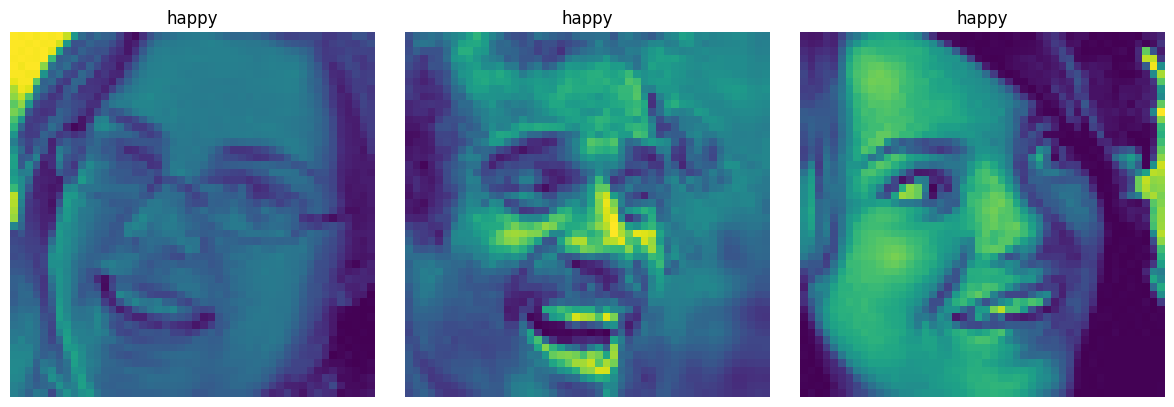

Displaying 3 images for category: neutral


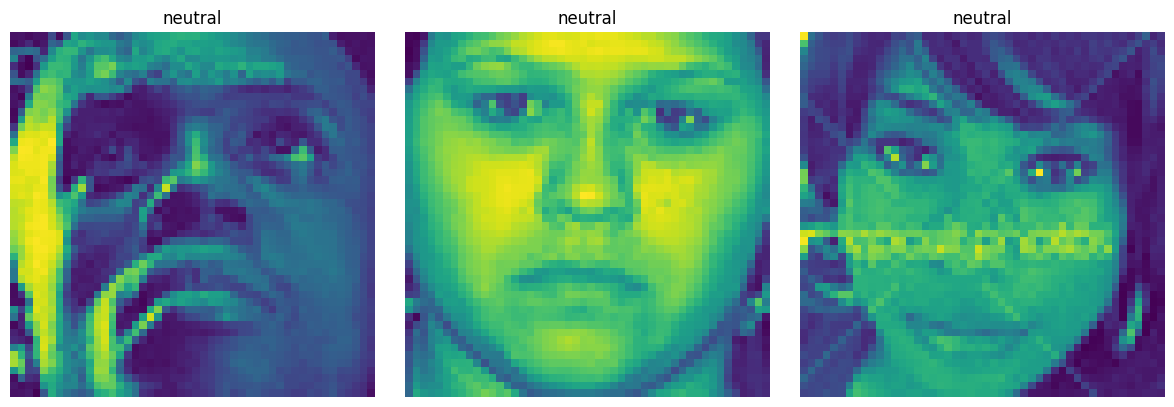

Displaying 3 images for category: sad


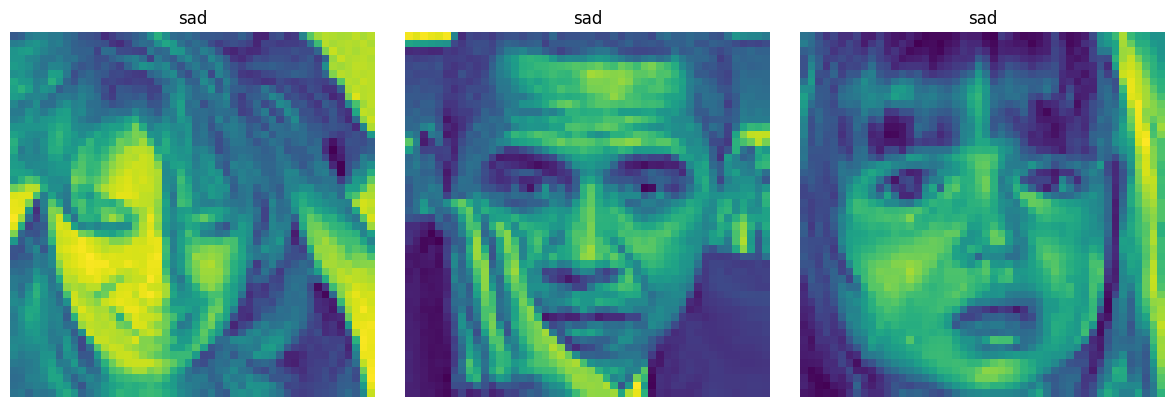

Displaying 3 images for category: surprise


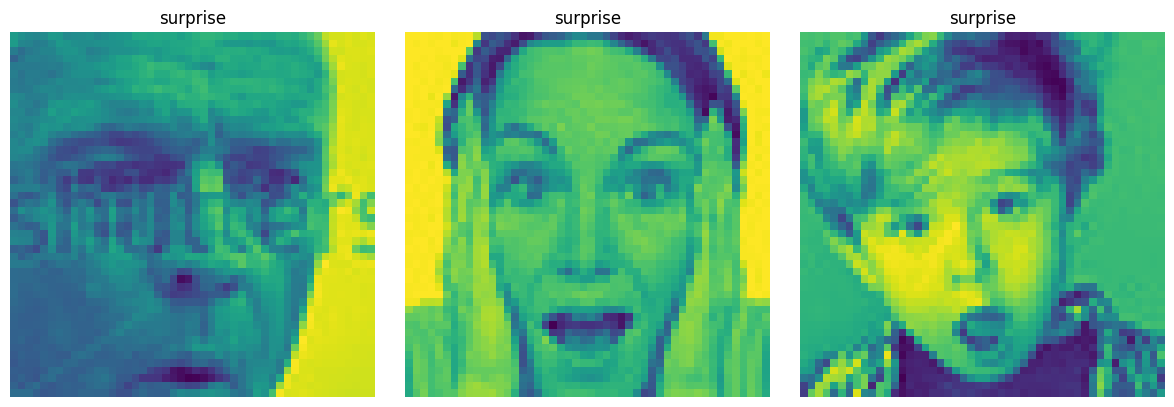

In [3]:
# visualize the first 3 images for each category, side by side
for category, images in first_3_images.items():
    print(f"Displaying 3 images for category: {category}")
    
    # set up a grid for 3 images side by side
    plt.figure(figsize=(12, 4))  # adjust size as needed
    for i, img_path in enumerate(images):
        img = Image.open(img_path)  # open the image
        plt.subplot(1, 3, i + 1)  # create a subplot (1 row, 3 columns)
        plt.imshow(img)  # if you want to display image in grayscale use cmap="gray
        plt.title(category, fontsize=12)  # add title for each image
        plt.axis("off")  # hide axes for clarity
    
    plt.tight_layout()
    plt.show() 

In [4]:
# see how many images we have for each category
categories = os.listdir(train_dir) 
for category in categories:
    category_path = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_path))
    print(f"Category '{category}' has {num_images} images.")

Category 'angry' has 3995 images.
Category 'disgust' has 436 images.
Category 'fear' has 4097 images.
Category 'happy' has 7215 images.
Category 'neutral' has 4965 images.
Category 'sad' has 4830 images.
Category 'surprise' has 3171 images.


In [18]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    categories = os.listdir(folder_path)
    
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")
    
    for label, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            print(f"Skipping non-directory: {category_path}")
            continue
        
        for img_name in os.listdir(category_path):
            if not img_name.lower().endswith(valid_extensions):
                print(f"Skipping unsupported file: {img_name}")
                continue
            
            img_path = os.path.join(category_path, img_name)
            img_path = img_path.replace("\\", "/")  # Tüm ters eğik çizgileri ileri eğik çizgiye çevirin
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            
            try:
                img = cv2.resize(img, (48, 48))  # 48x48 boyutuna yeniden boyutlandır
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error resizing image {img_path}: {e}")
    
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10118481.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10120469.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10131352.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10161559.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_1021836.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10269675.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10278738.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10290703.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10295477.jpg
Failed to load image: C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10315441.jpg
Failed to load image: C:/Users/user/OneDr

In [19]:
img_path = "C:/Users/user/OneDrive/Masaüstü/fer2013/train/angry/Training_10118481.jpg"  # Kendi yolunuzu ekleyin
print(f"Image path exists: {os.path.exists(img_path)}")

from PIL import Image
try:
    img = Image.open(img_path)
    img.verify()  # Dosyanın bütünlüğünü kontrol eder
    print("Image loaded successfully with Pillow!")
except Exception as e:
    print(f"Failed to load image with Pillow: {e}")

Image path exists: True
Image loaded successfully with Pillow!
